##Student Project 2 – Spam Email Classification

• Tujuan: melakukan klasifikasi email spam atau tidak
*   Dataset: emails.csv
*   Methods
  1. Logistic Regression
  2. k-Nearest Neighbors
  3. Decision Trees
  4. Support Vector Machine
  5. Naive Bayes
  6. Neural Network

In [176]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [178]:
##Import Packages

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns #visual
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs


In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
# ambil data (load dataset)
filename = '/content/drive/MyDrive/Training/datasets/emails.csv'
df=pd.read_csv(filename)
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [181]:
# mengetahui shape dari data yang digunakan
df.shape

(5172, 3002)

In [182]:
# mengetahui data type dari tiap column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [183]:
#mengetahui hasil analisa statistik untuk tiap column
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [184]:
# Cek data apakah terdapat data kosong
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [185]:
# Cek data apakah terdapat data yang terduplikat 
df.duplicated().sum()

0

In [187]:
df['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

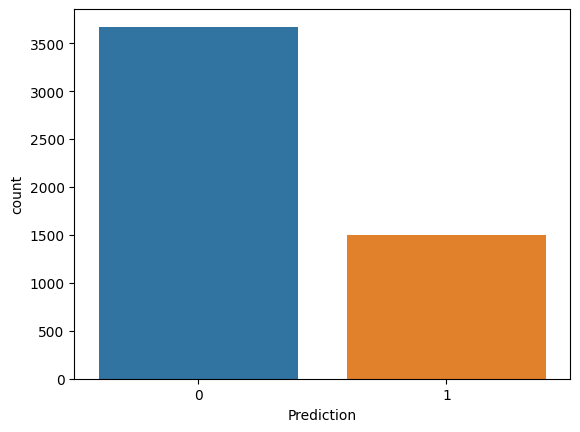

In [188]:
sns.countplot(data=df, x='Prediction')
plt.show()

In [ ]:
# pre-processing

x = df.iloc[:,1:3001]
x

y = df.iloc[:, -1].values
y


array([0, 0, 0, ..., 1, 1, 0])

## **1. Logistic Regression**

In [189]:
# membuat Logistic Regression model dengan SGD (Stochastic Gradient Descent)
# los function: log
logistic = SGDClassifier(loss="log")
print(logistic.get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [191]:
# Train model
logistic.fit(x, y)

print(f"Model weights: {logistic.coef_}, bias: {logistic.intercept_}")

# test
y_pred = logistic.predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Model weights: [[-98.79565816 -97.97722192 -51.32120828 ...  -3.13154121 -23.32761822
   -2.74696598]], bias: [176.84895331]


In [192]:
# Print report dengan classification metrics
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3672
           1       0.92      0.94      0.93      1500

    accuracy                           0.96      5172
   macro avg       0.95      0.95      0.95      5172
weighted avg       0.96      0.96      0.96      5172



In [193]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[3557,  115],
       [  94, 1406]])

Text(0.5, 427.9555555555555, 'Predicted label')

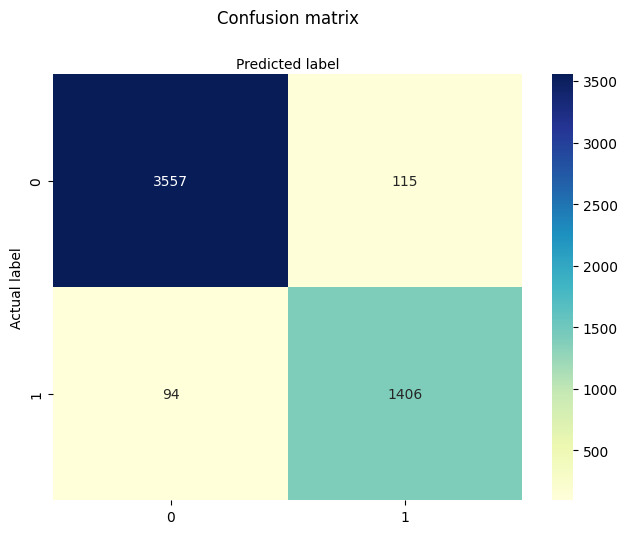

In [194]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Hitung Accuracy, Precision, dan Recall**

In [196]:
# accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))
print("F1-Score:", metrics.f1_score(y, y_pred))

Accuracy: 0.9595901005413766
Precision: 0.9243918474687706
Recall: 0.9373333333333334
F1-Score: 0.9308176100628932


**ROC Curve**

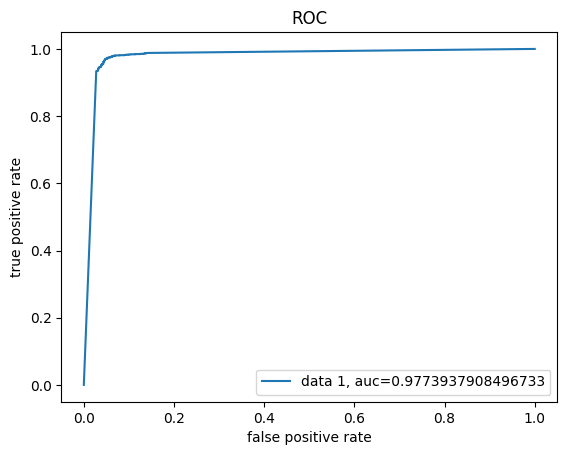

In [197]:
y_pred_proba = logistic.predict_proba(x)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

## **2. k-Nearest Neighbors**

In [198]:
#Ambil dataset
from sklearn.model_selection import train_test_split

In [199]:
# buat data training dan testing
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25)

In [200]:
from sklearn.neighbors import KNeighborsClassifier

# buat classifier untuk Nearest Neighbors
n_neighbors = 22
clf = KNeighborsClassifier(n_neighbors, weights='uniform')
print(clf.get_params())

# Train model
clf.fit(trainx, trainy)

# test
y_pred_knn = clf.predict(testx)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 22, 'p': 2, 'weights': 'uniform'}


[[858  75]
 [ 81 279]]


Text(0.5, 427.9555555555555, 'Predicted label')

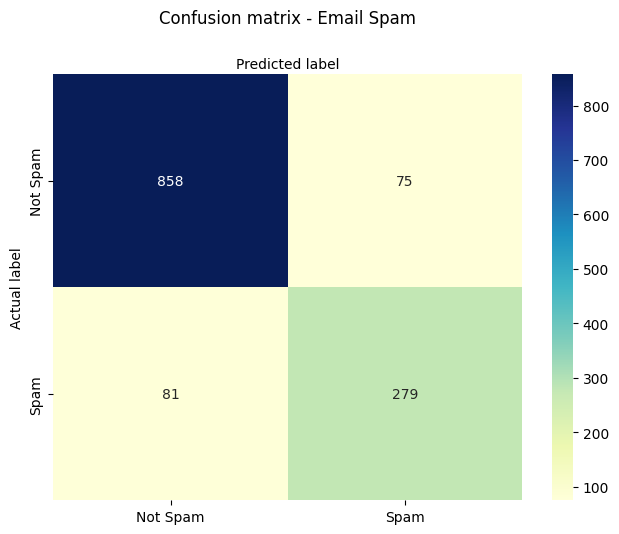

In [201]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testy, y_pred_knn)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [202]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testy, y_pred_knn))
print("Precision:", metrics.precision_score(testy, y_pred_knn))
print("Recall:", metrics.recall_score(testy, y_pred_knn))
print("F1-Score:", metrics.f1_score(testy, y_pred_knn))

Accuracy: 0.8793503480278422
Precision: 0.788135593220339
Recall: 0.775
F1-Score: 0.7815126050420169


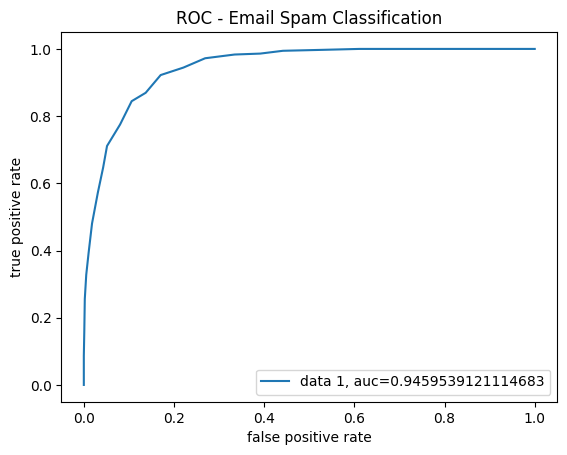

In [203]:
# ROC
y_pred_proba = clf.predict_proba(testx)[::,1]
fpr, tpr, _ = metrics.roc_curve(testy,  y_pred_proba)
auc = metrics.roc_auc_score(testy, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification')
plt.legend(loc=4)
plt.show()

## **3. Decision Trees**

In [204]:
# buat data training dan testing
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25)

In [205]:
#Ambil dataset
from sklearn.tree import DecisionTreeClassifier

# buat classifier untuk DecisionTreeClassifier
clf_dtree = DecisionTreeClassifier()
print(clf_dtree.get_params())

# Train model
clf_dtree.fit(trainx, trainy)

# test
y_pred_dtree = clf_dtree.predict(testx)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


[[856  47]
 [ 36 354]]


Text(0.5, 427.9555555555555, 'Predicted label')

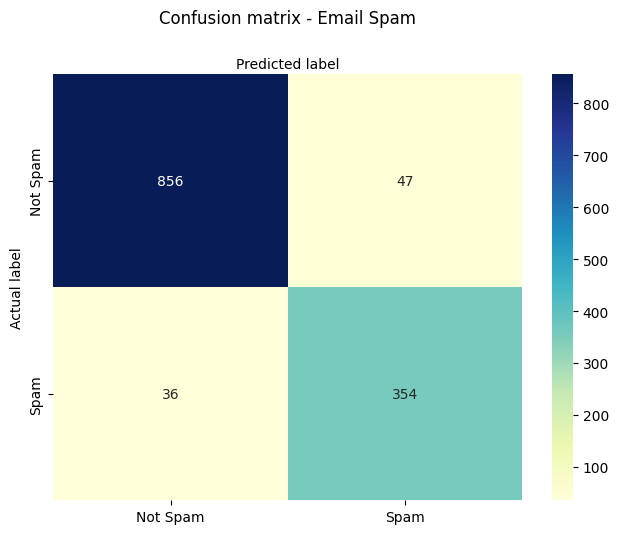

In [206]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testy, y_pred_dtree)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [207]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testy, y_pred_dtree))
print("Precision:", metrics.precision_score(testy, y_pred_dtree))
print("Recall:", metrics.recall_score(testy, y_pred_dtree))
print("F1-Score:", metrics.f1_score(testy, y_pred_dtree))

Accuracy: 0.9358081979891725
Precision: 0.8827930174563591
Recall: 0.9076923076923077
F1-Score: 0.8950695322376738


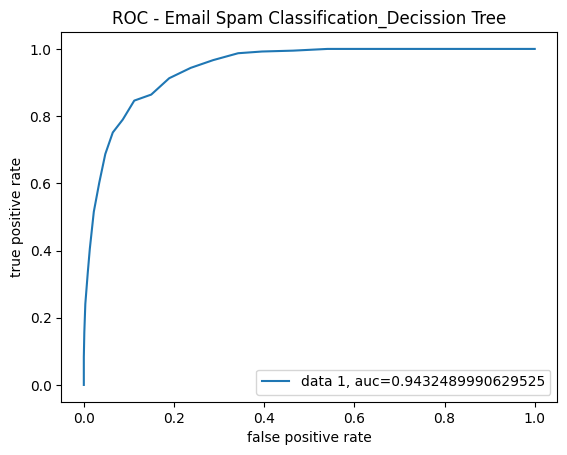

In [208]:
# ROC
y_pred_proba = clf.predict_proba(testx)[::,1]
fpr, tpr, _ = metrics.roc_curve(testy,  y_pred_proba)
auc = metrics.roc_auc_score(testy, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_Decission Tree')
plt.legend(loc=4)
plt.show()

##**4. Support Vector Machine**

In [209]:
from sklearn.svm import SVC

In [210]:
# buat data training dan testing
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25)

In [211]:
# buat classifier untuk SVC
clf = SVC(probability=True)
print(clf.get_params())

# Train model
clf.fit(trainx, trainy)

# test
y_pred_svm = clf.predict(testx)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


[[886  19]
 [251 137]]


Text(0.5, 427.9555555555555, 'Predicted label')

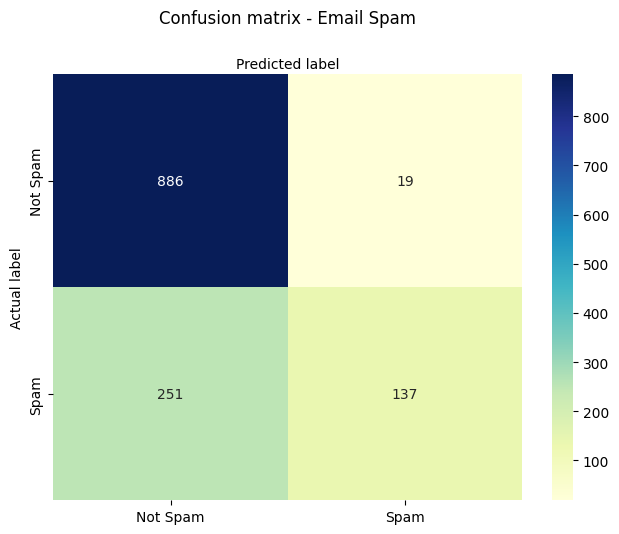

In [212]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testy, y_pred_svm)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [213]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testy, y_pred_svm))
print("Precision:", metrics.precision_score(testy, y_pred_svm))
print("Recall:", metrics.recall_score(testy, y_pred_svm))
print("F1-Score:", metrics.f1_score(testy, y_pred_svm))

Accuracy: 0.7911832946635731
Precision: 0.8782051282051282
Recall: 0.35309278350515466
F1-Score: 0.5036764705882353


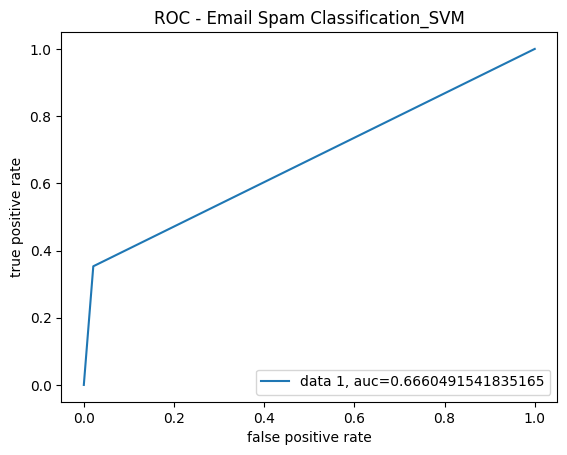

In [214]:
# ROC
y_pred_proba = clf.predict_proba(testx)[::,1]
fpr, tpr, _ = metrics.roc_curve(testy,  y_pred_svm)
auc = metrics.roc_auc_score(testy, y_pred_svm)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_SVM')
plt.legend(loc=4)
plt.show()

##**5. Naive Bayes**

In [215]:
from sklearn.naive_bayes import GaussianNB

In [216]:
# buat data training dan testing
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25)

In [217]:
# buat classifier untuk naive bayes
clf = GaussianNB()
print(clf.get_params())

# Train model
clf.fit(trainx, trainy)

# test
y_pred_NB = clf.predict(testx)

{'priors': None, 'var_smoothing': 1e-09}


[[885  38]
 [ 16 354]]


Text(0.5, 427.9555555555555, 'Predicted label')

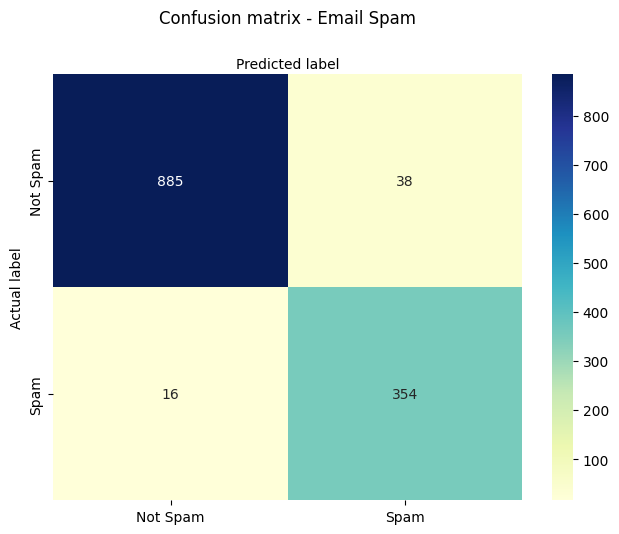

In [218]:
# confusion_matrix
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(testy, y_pred_NB)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [219]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testy, y_pred_NB))
print("Precision:", metrics.precision_score(testy, y_pred_NB))
print("Recall:", metrics.recall_score(testy, y_pred_NB))
print("F1-Score:", metrics.f1_score(testy, y_pred_NB))

Accuracy: 0.9582366589327146
Precision: 0.9030612244897959
Recall: 0.9567567567567568
F1-Score: 0.9291338582677166


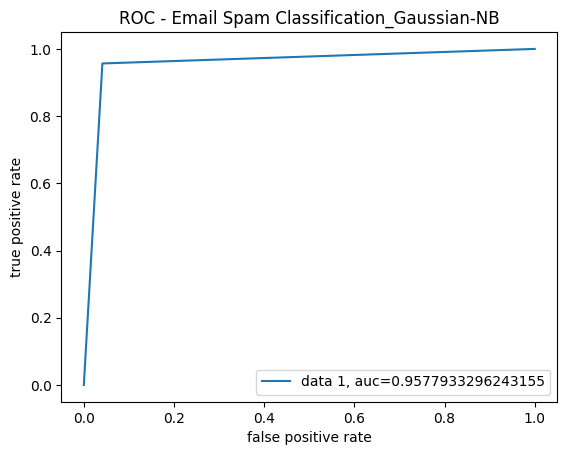

In [220]:
# ROC
y_pred_proba = clf.predict_proba(testx)[::,1]
fpr, tpr, _ = metrics.roc_curve(testy,  y_pred_NB)
auc = metrics.roc_auc_score(testy, y_pred_NB)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_Gaussian-NB')
plt.legend(loc=4)
plt.show()

##**6. Neural Network**

In [221]:
from sklearn.neural_network import MLPClassifier

In [222]:
# buat data training dan testing
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25)

In [223]:
# buat classifier untuk MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(200,150,50),
                    max_iter = 100000,activation = 'relu',
                    solver = 'adam')
print(clf.get_params())

# Train model
clf.fit(trainx, trainy)

# test
y_pred_nn = clf.predict(testx)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (200, 150, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


[[923  12]
 [  6 352]]


Text(0.5, 427.9555555555555, 'Predicted label')

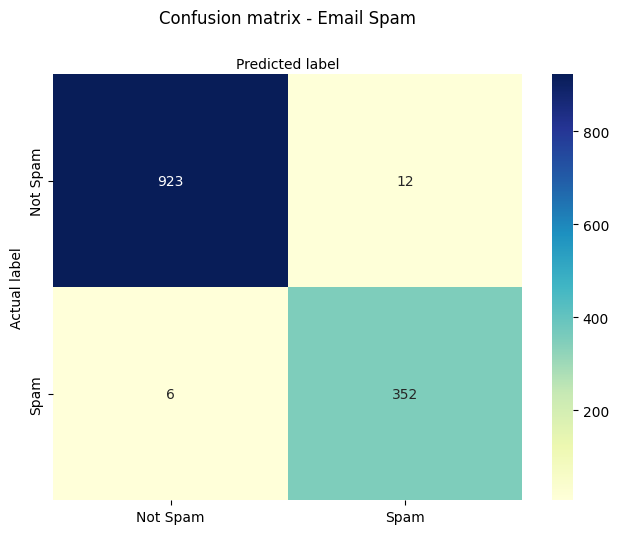

In [224]:
# confusion_matrix
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(testy, y_pred_nn)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [225]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testy, y_pred_nn))
print("Precision:", metrics.precision_score(testy, y_pred_nn))
print("Recall:", metrics.recall_score(testy, y_pred_nn))
print("F1-Score:", metrics.f1_score(testy, y_pred_nn))

Accuracy: 0.9860788863109049
Precision: 0.967032967032967
Recall: 0.9832402234636871
F1-Score: 0.9750692520775622


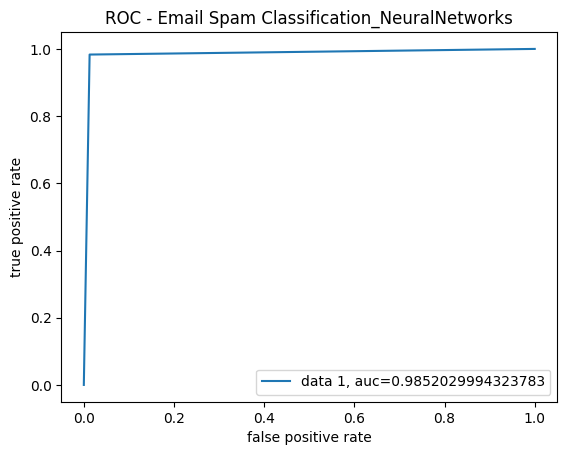

In [226]:
# ROC
y_pred_proba = clf.predict_proba(testx)[::,1]
fpr, tpr, _ = metrics.roc_curve(testy,  y_pred_nn)
auc = metrics.roc_auc_score(testy, y_pred_nn)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_NeuralNetworks')
plt.legend(loc=4)
plt.show()

rekapitulasi hasil perhitungan tiap-tiap model:
1. Logistic Regression
*   Accuracy: 96%
*   Precision: 92%
*   Recall: 94%
*   F1 Score: 93%
*   ROC: 98%

2. k-Nearest Neighbors
*   Accuracy: 88%
*   Precision: 79%
*   Recall: 78%
*   F1 Score: 78%
*   ROC: 95%

3. Decision Trees
*   Accuracy: 94%
*   Precision: 88%
*   Recall: 91%
*   F1 Score: 90%
*   ROC: 94%

4. Support Vector Machine
*   Accuracy: 79%
*   Precision: 88%
*   Recall: 35%
*   F1 Score: 50%
*   ROC: 67%

5. Naive Bayes
*   Accuracy: 96%
*   Precision: 90%
*   Recall: 96%
*   F1 Score: 93%
*   ROC: 96%

6. Neural Network
*   Accuracy: 99%
*   Precision: 97%
*   Recall: 98%
*   F1 Score: 97%
*   ROC: 98%